# Grafi v Sage

Sage ima vgrajeno podporo za grafe. Poglejmo si, kaj lahko z njimi počnemo.

## Vgrajeni grafi

Do vgrajenih grafov dostopamo preko metod objekta `graphs`.

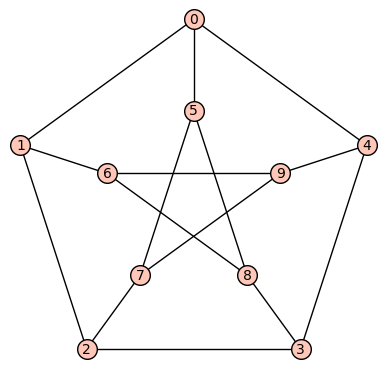

In [1]:
G = graphs.PetersenGraph()
G.show()

In [2]:
# število vozlišč, število povezav, premer, ožina (dolžina najkrajšega cikla)
G.order(), G.size(), G.diameter(), G.girth()

(10, 15, 2, 5)

In [3]:
# razdalja med vozliščema
G.distance(1, 3)

2

In [4]:
# barvanje grafa
G.coloring()

[[1, 3, 5, 9], [0, 2, 6], [4, 7, 8]]

In [5]:
G.is_hamiltonian(), G.is_eulerian()

(False, False)

In [6]:
# za vsako vozlišče izpišimo sosede
for v in G:
    print v, G[v]

0 [1, 4, 5]
1 [0, 2, 6]
2 [1, 3, 7]
3 [2, 4, 8]
4 [0, 3, 9]
5 [0, 7, 8]
6 [1, 8, 9]
7 [2, 5, 9]
8 [3, 5, 6]
9 [4, 6, 7]


In [8]:
# Za vsak par nesosednih vozlišč izpišimo skupne sosede
for u, v in G.complement().edge_iterator(labels=False):
    print u, v, Set(G[u]) & Set(G[v])

0 2 {1}
0 3 {4}
0 6 {1}
0 7 {5}
0 8 {5}
0 9 {4}
1 3 {2}
1 4 {0}
1 5 {0}
1 7 {2}
1 8 {6}
1 9 {6}
2 4 {3}
2 5 {7}
2 6 {1}
2 8 {3}
2 9 {7}
3 5 {8}
3 6 {8}
3 7 {2}
3 9 {4}
4 5 {0}
4 6 {9}
4 7 {9}
4 8 {3}
5 6 {8}
5 9 {7}
6 7 {9}
7 8 {5}
8 9 {6}


## Definiranje grafov

Obstaja več načinov definiranja grafov. Najenostavnejši je ta, da naštejemo povezave v grafu.

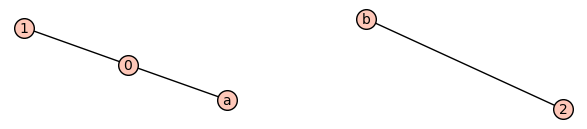

In [9]:
H = Graph([(0, 1), (0, 'a'), (2, 'b')])
H.plot()

Graf lahko definiramo tudi tako, da podamo množico vozlišč

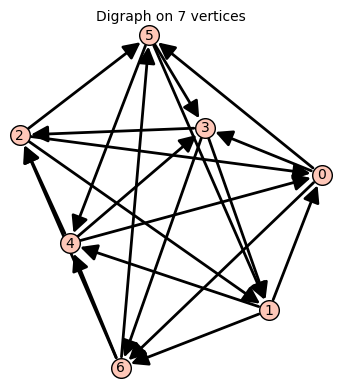

In [11]:
DiGraph([GF(7), lambda u, v: (u-v) in [1, 2, 4]])

## Generiranje grafov

V Sage obstaja več načinov, kako generirati grafe. Pogledali si bomo nekaj od njih.

### Majhni grafi

Majhne grafe lahko dobimo s funkcijo `graphs`.

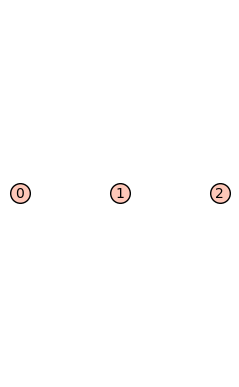

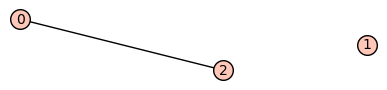

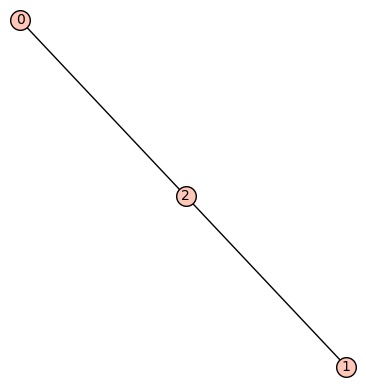

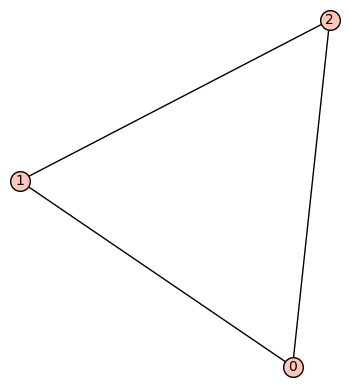

In [12]:
for G in graphs(3): # grafi na treh vozliščih
    G.show()

In [13]:
list(graphs(4)) # seznam grafov na 4 vozliščih

[Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices]

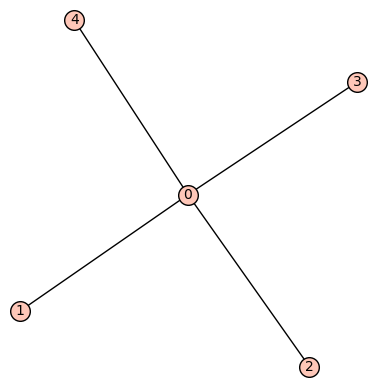

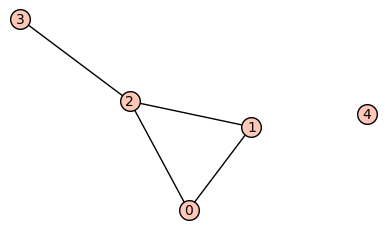

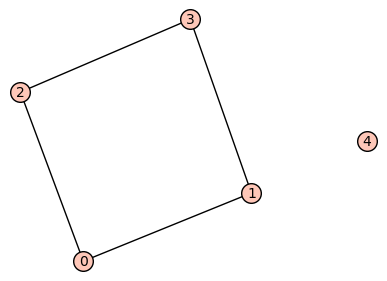

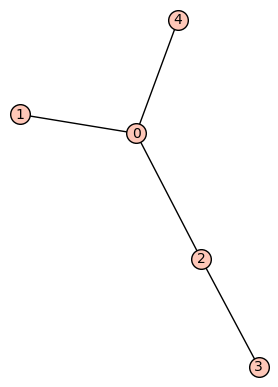

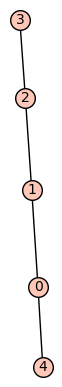

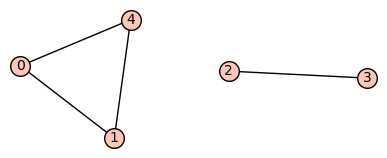

In [14]:
for G in graphs(5, size=4): # grafi s 5 vozlišči in 4 povezavami
    G.show()

Grafe je mogoče filtrirati, vendar je ta postopek pri večjih grafih nekoliko neučinkovit, saj se generirajo tudi grafi, ki jih zavržemo.

In [15]:
[G for G in graphs(4, augment='vertices') if G.is_connected()] # povezani grafi na največ 4 vozliščih

[Graph on 0 vertices,
 Graph on 1 vertex,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 3 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 2 vertices,
 Graph on 3 vertices,
 Graph on 4 vertices]

### Napredno generiranje grafov

Bolj natančno lahko grafe generiramo s pomočjo metode `graphs.nauty_geng`.

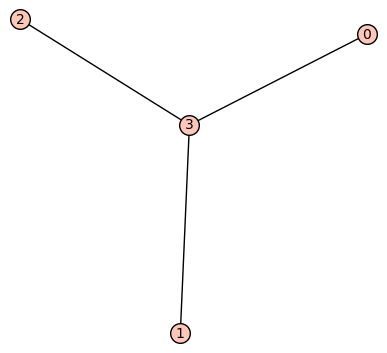

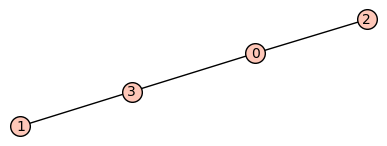

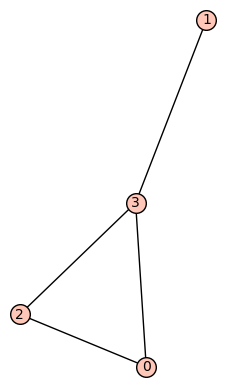

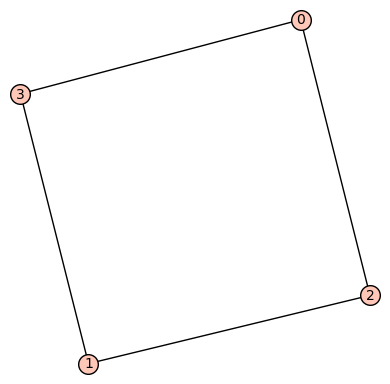

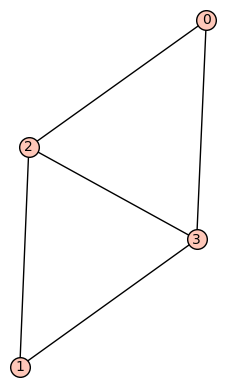

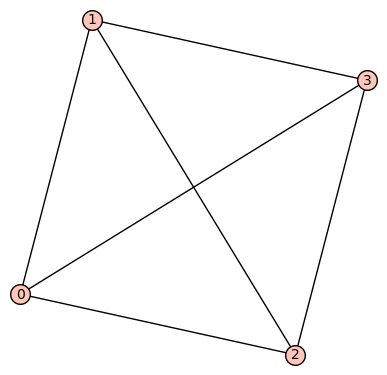

In [16]:
for G in graphs.nauty_geng('4 -c'): # povezani grafi na 4 vozliščih
    G.show()

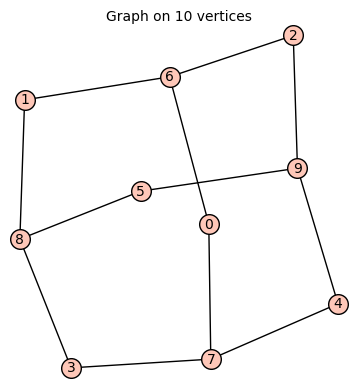

In [17]:
gen = (G for G in graphs.nauty_geng('10 0:20 -b -f -d2')) # dvodelni grafi brez štirikotnikov na 10 vozliščih z največ 20 povezavami in najmanjšo stopnjo vsaj 2
next(gen)

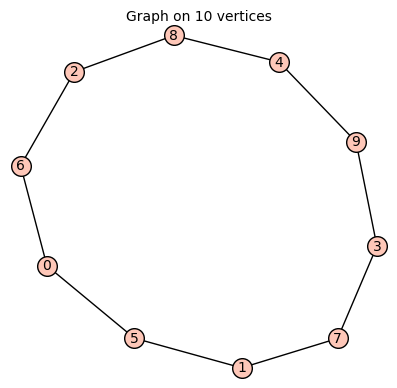

In [18]:
next(gen) # še en tak graf

### Dokumentacija

In [19]:
?graphs

Type:            LazyImport
String form:     <sage.graphs.graph_generators.GraphGenerators instance at 0x7f4c89c67050>
File:            /ext/sage/sage-8.8_1804/local/lib/python2.7/site-packages/sage/misc/lazy_import.pyx
Docstring:      
   A class consisting of constructors for several common graphs, as
   well as orderly generation of isomorphism class representatives.
   See the "module's help" for a list of supported constructors.

   A list of all graphs and graph structures (other than isomorphism
   class representatives) in this database is available via tab
   completion. Type "graphs." and then hit the tab key to see which
   graphs are available.

   The docstrings include educational information about each named
   graph with the hopes that this class can be used as a reference.

   For all the constructors in this class (except the octahedral,
   dodecahedral, random and empty graphs), the position dictionary is
   filled to override the spring-layout algorithm.

   ORDERLY

In [20]:
?graphs.nauty_geng

Signature:      graphs.nauty_geng(options='', debug=False)
Docstring:     
   Returns a generator which creates graphs from nauty's geng program.

   INPUT:

   * "options" - a string passed to  geng  as if it was run at a
     system command line. At a minimum, you *must* pass the number of
     vertices you desire.  Sage expects the graphs to be in nauty's
     "graph6" format, do not set an option to change this default or
     results will be unpredictable.

   * "debug" - default: "False" - if "True" the first line of geng's
     output to standard error is captured and the first call to the
     generator's "next()" function will return this line as a string.
     A line leading with ">A" indicates a successful initiation of the
     program with some information on the arguments, while a line
     beginning with ">E" indicates an error with the input.

   The possible options, obtained as output of "geng --help":

           n    : the number of vertices
      mine:maxe : a rang